In [1]:
# Data provided by Redfin, a national real estate brokerage
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [2]:
# Store filepath in a variable
raw_data_national = "../Resources/Redfin-monthly-housing-National-2020-08.csv"
raw_data_state_county = "../Resources/Redfin-monthly-housing-States-Counties-2020-08.csv"

# Read our Data files into a Pandas data fram
raw_data_national_df = pd.read_csv(raw_data_national, encoding="utf-8")
raw_data_national_df

,Region,Month of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,City,last_updated,Measure Display,parent_metro_region,...,pending_sales_yoy,Period Duration,Price Drops,Price Drops Mom,Price Drops Yoy,property_type_id,region_type_id,Sold Above List,Sold Above List Mom,Sold Above List Yoy
0,National,January 2016,All Residential,National,False,US,National,9/13/2020 2:44:56 PM,NaN,NaN,...,6.2%,30,0.108486,0.015783,0.014092,-1,11,0.184654,-0.006786,0.018762
1,National,April 2012,All Residential,National,False,US,National,9/13/2020 2:44:56 PM,NaN,NaN,...,22.5%,30,0.056576,-0.003321,-0.017283,-1,11,0.188481,0.005823,0.018680
2,National,March 2019,All Residential,National,False,US,National,9/13/2020 2:44:56 PM,NaN,NaN,...,-6.6%,30,0.132078,0.008236,0.015496,-1,11,0.214007,0.020586,-0.042033
3,National,May 2019,All Residential,National,False,US,National,9/13/2020 2:44:56 PM,NaN,NaN,...,-2.7%,30,0.155416,0.015202,0.014252,-1,11,0.258254,0.018019,-0.036337
4,National,June 2019,All Residential,National,False,US,National,9/13/2020 2:44:56 PM,NaN,NaN,...,-4.4%,30,0.161023,0.005607,0.008912,-1,11,0.262854,0.004600,-0.033756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,National,March 2014,All Residential,National,False,US,National,9/13/2020 2:44:56 PM,NaN,NaN,...,1.1%,30,0.068123,0.008695,0.020165,-1,11,0.199315,0.008277,-0.024381
99,National,April 2014,All Residential,National,False,US,National,9/13/2020 2:44:56 PM,NaN,NaN,...,7.4%,30,0.087755,0.019632,0.035649,-1,11,0.211482,0.012167,-0.026532
100,National,September 2015,All Residential,National,False,US,National,9/13/2020 2:44:56 PM,NaN,NaN,...,15.7%,30,0.142515,0.005716,0.036945,-1,11,0.205594,-0.012604,0.021916
101,National,March 2018,All Residential,National,False,US,National,9/13/2020 2:44:56 PM,NaN,NaN,...,1.8%,30,0.116582,0.012110,0.006863,-1,11,0.256040,0.029290,0.019692


In [3]:
# Read our Data files into a Pandas data fram
raw_data_state_county_df = pd.read_csv(raw_data_state_county, encoding="utf-8")
raw_data_state_county_df

,Region,Month of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,City,last_updated,Measure Display,parent_metro_region,...,pending_sales_yoy,Period Duration,Price Drops,Price Drops Mom,Price Drops Yoy,property_type_id,region_type_id,Sold Above List,Sold Above List Mom,Sold Above List Yoy
0,"Kodiak Island Borough, AK",May 2012,All Residential,County,False,AK,NaN,9/13/2020 2:40:54 PM,NaN,Alaska nonmetropolitan area,...,100.0%,30,NaN,NaN,NaN,-1,5,0.250000,-0.083333,0.250000
1,"Kodiak Island Borough, AK",June 2012,All Residential,County,False,AK,NaN,9/13/2020 2:40:54 PM,NaN,Alaska nonmetropolitan area,...,-80.0%,30,NaN,NaN,NaN,-1,5,0.000000,-0.250000,0.000000
2,"Kenai Peninsula Borough, AK",December 2012,All Residential,County,False,AK,NaN,9/13/2020 2:40:54 PM,NaN,Alaska nonmetropolitan area,...,-40.0%,30,NaN,NaN,NaN,-1,5,0.000000,-0.108696,-0.081081
3,"Kodiak Island Borough, AK",May 2013,All Residential,County,False,AK,NaN,9/13/2020 2:40:54 PM,NaN,Alaska nonmetropolitan area,...,-50.0%,30,NaN,NaN,NaN,-1,5,0.000000,0.000000,-0.250000
4,"Kenai Peninsula Borough, AK",November 2013,All Residential,County,False,AK,NaN,9/13/2020 2:40:54 PM,NaN,Alaska nonmetropolitan area,...,31.3%,30,NaN,NaN,NaN,-1,5,0.054054,-0.024071,-0.054642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118007,West Virginia,July 2014,All Residential,State,False,WV,NaN,9/13/2020 2:40:54 PM,NaN,South Region,...,-12.1%,30,0.169265,0.009747,0.015527,-1,4,0.155313,0.021085,-0.043482
118008,West Virginia,June 2015,All Residential,State,False,WV,NaN,9/13/2020 2:40:54 PM,NaN,South Region,...,-4.1%,30,0.192494,0.031007,0.032976,-1,4,0.147222,0.005308,0.012994
118009,West Virginia,March 2016,All Residential,State,False,WV,NaN,9/13/2020 2:40:54 PM,NaN,South Region,...,19.9%,30,0.152149,0.037880,0.023944,-1,4,0.203571,0.117208,0.024405
118010,West Virginia,October 2018,All Residential,State,False,WV,NaN,9/13/2020 2:40:54 PM,NaN,South Region,...,-15.3%,30,0.287199,0.052206,0.113132,-1,4,0.140449,-0.075843,-0.014723


In [4]:
# Display columns for National data
raw_data_national_df.columns

Index(['Region', 'Month of Period End', 'Property Type', 'Region Type',
       'Seasonally Adjusted', 'State Code', 'City', 'last_updated',
       'Measure Display', 'parent_metro_region', 'Period Begin', 'Period End',
       'State', 'Table Id', 'Worksheet Filter', 'active_listings',
       'active_listings_mom', 'active_listings_yoy', 'Avg Sale To List',
       'Avg Sale To List Mom', 'Avg Sale To List Yoy', 'Homes Sold',
       'Homes Sold Mom', 'Homes Sold Yoy', 'Inventory', 'Inventory Mom',
       'Inventory Yoy', 'Median Dom', 'Median Dom Mom', 'Median Dom Yoy',
       'Median List Ppsf', 'Median List Ppsf Mom', 'Median List Ppsf Yoy',
       'Median List Price', 'Median List Price Mom', 'Median List Price Yoy',
       'Median Ppsf', 'Median Ppsf Mom', 'Median Ppsf Yoy',
       'Median Sale Price', 'Median Sale Price Mom', 'Median Sale Price Yoy',
       'months_of_supply', 'months_of_supply_mom', 'months_of_supply_yoy',
       'New Listings', 'New Listings Mom', 'New Listings Yo

In [5]:
# Display columns for State & County data
raw_data_state_county_df.columns

Index(['Region', 'Month of Period End', 'Property Type', 'Region Type',
       'Seasonally Adjusted', 'State Code', 'City', 'last_updated',
       'Measure Display', 'parent_metro_region', 'Period Begin', 'Period End',
       'State', 'Table Id', 'Worksheet Filter', 'active_listings',
       'active_listings_mom', 'active_listings_yoy', 'Avg Sale To List',
       'Avg Sale To List Mom', 'Avg Sale To List Yoy', 'Homes Sold',
       'Homes Sold Mom', 'Homes Sold Yoy', 'Inventory', 'Inventory Mom',
       'Inventory Yoy', 'Median Dom', 'Median Dom Mom', 'Median Dom Yoy',
       'Median List Ppsf', 'Median List Ppsf Mom', 'Median List Ppsf Yoy',
       'Median List Price', 'Median List Price Mom', 'Median List Price Yoy',
       'Median Ppsf', 'Median Ppsf Mom', 'Median Ppsf Yoy',
       'Median Sale Price', 'Median Sale Price Mom', 'Median Sale Price Yoy',
       'months_of_supply', 'months_of_supply_mom', 'months_of_supply_yoy',
       'New Listings', 'New Listings Mom', 'New Listings Yo

In [6]:
# Create a list of the columns to keep
# Columns and decisions whether to KEEP or DROP:
#    'Region' - KEEP - this column identifies National, state name, or county name
#    'Month of Period End' - KEEP - this column identifies the month and year for the record; we'll parse out these two data items later
#    'Property Type' - DROP - we only pulled "All Residential," so this field is the same for all records
#    'Region Type' - KEEP - this field identifies whether the record is 'National', 'State,' or 'County'
#    'Seasonally Adjusted' - DROP - this field is 'False' for all records
#    'State Code' - KEEP
#    'City' - DROP - this field is 'NaN' for all records because we did not pull data at the City level
#    'last_updated' - KEEP for now
#    'Measure Display' - DROP - this field is 'NaN' for all records
#    'parent_metro_region' - DROP - we do not want to aggregate by Region
#    'Period Begin' - DROP - we are getting the month and year from "Month of Period End"
#    'Period End' - DROP - we are getting the month and year from "Month of Period End"
#    'State' - KEEP
#    'Table Id' - DROP - this field seems to correspond with 'Region'
#    'Worksheet Filter' - DROP
#    'active_listings' - KEEP
#    'active_listings_mom' - DROP for now; 'mom' means 'month-over-month'; do not anticipate analyzing at that level
#    'active_listings_yoy' - DROP for now; 'yoy' means 'year-over-year'; do not anticipate analyzing at that level
#    'Avg Sale To List' - DROP for now; not anticipate analyzing on price
#    'Avg Sale To List Mom' - DROP for now; not anticipate analyzing on price
#    'Avg Sale To List Yoy' - DROP for now; not anticipate analyzing on price
#    'Homes Sold' - KEEP
#    'Homes Sold Mom' - DROP for now; 'mom' means 'month-over-month'; do not anticipate analyzing at that level
#    'Homes Sold Yoy' - DROP for now; 'yoy' means 'year-over-year'; do not anticipate analyzing at that level
#    'Inventory' - KEEP - 'Inventory' may help us with determining strength of Seller's Market/Buyer's Market
#    'Inventory Mom' - DROP for now; 'mom' means 'month-over-month'; do not anticipate analyzing at that level
#    'Inventory Yoy' - DROP for now; 'yoy' means 'year-over-year'; do not anticipate analyzing at that level
#    'Median Dom' - KEEP - 'Median Days on Market' may help us with determining strength of Seller's Market/Buyer's Market
#    'Median Dom Mom' - DROP for now; 'mom' means 'month-over-month'; do not anticipate analyzing at that level
#    'Median Dom Yoy' - DROP for now; 'yoy' means 'year-over-year'; do not anticipate analyzing at that level
#    'Median List Ppsf' - DROP for now; do not anticipate analyzing on price for listings 'ppsf' means 'price per sq ft'
#    'Median List Ppsf Mom' - DROP for now; do not anticipate analyzing on price
#    'Median List Ppsf Yoy' - DROP for now; do not anticipate analyzing on price
#    'Median List Price' - DROP for now; do not anticipate analyzing on price
#    'Median List Price Mom' - DROP for now; do not anticipate analyzing on price
#    'Median List Price Yoy' - DROP for now; do not anticipate analyzing on price
#    'Median Ppsf' - DROP for now; do not anticipate analyzing on price
#    'Median Ppsf Mom' - DROP for now; do not anticipate analyzing on price
#    'Median Ppsf Yoy' - DROP for now; do not anticipate analyzing on price
#    'Median Sale Price' - KEEP; sales price is essential in real estate economics
#    'Median Sale Price Mom' - DROP for now; do not anticipate analyzing on price
#    'Median Sale Price Yoy' - DROP for now; do not anticipate analyzing on price
#    'months_of_supply' - KEEP - 'Months of Supply' helps determine strength of Seller's Market vs Buyer's Market
#    'months_of_supply_mom' - DROP for now; 'mom' means 'month-over-month'; do not anticipate analyzing at that level
#    'months_of_supply_yoy' - DROP for now; 'yoy' means 'year-over-year'; do not anticipate analyzing at that level
#    'New Listings' - KEEP - 'New Listings' may help us with determining strength of Seller's Market/Buyer's Market
#    'New Listings Mom' - DROP for now; 'mom' means 'month-over-month'; do not anticipate analyzing at that level
#    'New Listings Yoy' - DROP for now; 'yoy' means 'year-over-year'; do not anticipate analyzing at that level
#    'Number of Records' - DROP - value is '1' for all records
#    'off_market_in_two_weeks' - DROP
#    'off_market_in_two_weeks_mom' - DROP for now; 'mom' means 'month-over-month'; do not anticipate analyzing at that level
#    'off_market_in_two_weeks_yoy' - DROP for now; 'yoy' means 'year-over-year'; do not anticipate analyzing at that level
#    'parent_metro_region_metro_code' - DROP - not analyzing on metro areas
#    'pending_sales' - KEEP for now
#    'pending_sales_mom' - DROP for now; 'mom' means 'month-over-month'; do not anticipate analyzing at that level
#    'pending_sales_yoy' - DROP for now; 'yoy' means 'year-over-year'; do not anticipate analyzing at that level
#    'Period Duration' - DROP - value is '30' for all records regardless of # days in the month being reported
#    'Price Drops' - DROP for now; do not anticipate analyzing on price
#    'Price Drops Mom' - DROP for now; do not anticipate analyzing on price
#    'Price Drops Yoy' - DROP for now; do not anticipate analyzing on price
#    'property_type_id' - DROP - value is '-1' for all records
#    'region_type_id' - KEEP - corresponds to 'Region Type' field; '4'='State', '5'='County', '11'='National'
#    'Sold Above List' - DROP for now; do not anticipate analyzing on price
#    'Sold Above List Mom' - DROP for now; do not anticipate analyzing on price
#    'Sold Above List Yoy' - DROP for now; do not anticipate analyzing on price
    
re_sales_columns=[
    'Region',
    'Month of Period End',
    'Region Type',
    'State Code',
    'last_updated',
    'State',
    'active_listings',
    'Homes Sold',
    'Inventory',
    'Median Dom',
    'Median Sale Price',
    'months_of_supply',
    'New Listings',
    'pending_sales',
    'region_type_id',
]
re_sales_columns

['Region',
 'Month of Period End',
 'Region Type',
 'State Code',
 'last_updated',
 'State',
 'active_listings',
 'Homes Sold',
 'Inventory',
 'Median Dom',
 'Median Sale Price',
 'months_of_supply',
 'New Listings',
 'pending_sales',
 'region_type_id']

In [7]:
# Pull National data into new dataframe for the desired columns
national_df = raw_data_national_df[re_sales_columns]
national_df

,Region,Month of Period End,Region Type,State Code,last_updated,State,active_listings,Homes Sold,Inventory,Median Dom,Median Sale Price,months_of_supply,New Listings,pending_sales,region_type_id
0,National,January 2016,National,US,9/13/2020 2:44:56 PM,U.S.,2079954,341903,1604314,66,$228K,4.692296,498183,265223,11
1,National,April 2012,National,US,9/13/2020 2:44:56 PM,U.S.,2662923,404927,2155803,80,$178K,5.323918,607611,309537,11
2,National,March 2019,National,US,9/13/2020 2:44:56 PM,U.S.,2129299,490722,1494395,50,$283K,3.045295,711348,458146,11
3,National,May 2019,National,US,9/13/2020 2:44:56 PM,U.S.,2375409,647282,1657511,37,$298K,2.560723,835135,572548,11
4,National,June 2019,National,US,9/13/2020 2:44:56 PM,U.S.,2372950,624623,1696761,36,$303K,2.716453,737370,536436,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,National,March 2014,National,US,9/13/2020 2:44:56 PM,U.S.,2353857,392509,1820559,71,$210K,4.638250,641551,332653,11
99,National,April 2014,National,US,9/13/2020 2:44:56 PM,U.S.,2498118,444227,1889755,59,$215K,4.254028,717268,417413,11
100,National,September 2015,National,US,9/13/2020 2:44:56 PM,U.S.,2602317,525632,2002245,50,$234K,3.809216,603165,396150,11
101,National,March 2018,National,US,9/13/2020 2:44:56 PM,U.S.,2037801,520689,1385696,45,$277K,2.661272,733488,490672,11


In [8]:
# Pull State and County data into new dataframe for the desired columns
state_county_df = raw_data_state_county_df[re_sales_columns]
state_county_df

,Region,Month of Period End,Region Type,State Code,last_updated,State,active_listings,Homes Sold,Inventory,Median Dom,Median Sale Price,months_of_supply,New Listings,pending_sales,region_type_id
0,"Kodiak Island Borough, AK",May 2012,County,AK,9/13/2020 2:40:54 PM,Alaska,50.0,8.0,43.0,83.0,$188K,5.4,8.0,6.0,5
1,"Kodiak Island Borough, AK",June 2012,County,AK,9/13/2020 2:40:54 PM,Alaska,55.0,3.0,51.0,134.0,$289K,17.0,13.0,1.0,5
2,"Kenai Peninsula Borough, AK",December 2012,County,AK,9/13/2020 2:40:54 PM,Alaska,558.0,31.0,480.0,185.0,$208K,15.5,31.0,6.0,5
3,"Kodiak Island Borough, AK",May 2013,County,AK,9/13/2020 2:40:54 PM,Alaska,59.0,7.0,50.0,160.0,$280K,7.1,14.0,3.0,5
4,"Kenai Peninsula Borough, AK",November 2013,County,AK,9/13/2020 2:40:54 PM,Alaska,688.0,37.0,598.0,101.0,$205K,16.2,46.0,21.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118007,West Virginia,July 2014,State,WV,9/13/2020 2:40:54 PM,West Virginia,2590.0,367.0,2245.0,47.0,$178K,6.1,590.0,233.0,4
118008,West Virginia,June 2015,State,WV,9/13/2020 2:40:54 PM,West Virginia,2660.0,360.0,2265.0,75.0,$187K,6.3,612.0,259.0,4
118009,West Virginia,March 2016,State,WV,9/13/2020 2:40:54 PM,West Virginia,2154.0,280.0,1722.0,134.0,$154K,6.2,566.0,229.0,4
118010,West Virginia,October 2018,State,WV,9/13/2020 2:40:54 PM,West Virginia,1973.0,356.0,1539.0,62.0,$192K,4.3,426.0,249.0,4


In [9]:
# Combine the National dataframe and the State and County dataframe
combined_df = national_df.append(state_county_df,ignore_index=True)
combined_df

,Region,Month of Period End,Region Type,State Code,last_updated,State,active_listings,Homes Sold,Inventory,Median Dom,Median Sale Price,months_of_supply,New Listings,pending_sales,region_type_id
0,National,January 2016,National,US,9/13/2020 2:44:56 PM,U.S.,2079954.0,341903.0,1604314.0,66.0,$228K,4.692296,498183.0,265223.0,11
1,National,April 2012,National,US,9/13/2020 2:44:56 PM,U.S.,2662923.0,404927.0,2155803.0,80.0,$178K,5.323918,607611.0,309537.0,11
2,National,March 2019,National,US,9/13/2020 2:44:56 PM,U.S.,2129299.0,490722.0,1494395.0,50.0,$283K,3.045295,711348.0,458146.0,11
3,National,May 2019,National,US,9/13/2020 2:44:56 PM,U.S.,2375409.0,647282.0,1657511.0,37.0,$298K,2.560723,835135.0,572548.0,11
4,National,June 2019,National,US,9/13/2020 2:44:56 PM,U.S.,2372950.0,624623.0,1696761.0,36.0,$303K,2.716453,737370.0,536436.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118110,West Virginia,July 2014,State,WV,9/13/2020 2:40:54 PM,West Virginia,2590.0,367.0,2245.0,47.0,$178K,6.100000,590.0,233.0,4
118111,West Virginia,June 2015,State,WV,9/13/2020 2:40:54 PM,West Virginia,2660.0,360.0,2265.0,75.0,$187K,6.300000,612.0,259.0,4
118112,West Virginia,March 2016,State,WV,9/13/2020 2:40:54 PM,West Virginia,2154.0,280.0,1722.0,134.0,$154K,6.200000,566.0,229.0,4
118113,West Virginia,October 2018,State,WV,9/13/2020 2:40:54 PM,West Virginia,1973.0,356.0,1539.0,62.0,$192K,4.300000,426.0,249.0,4


In [10]:
# Rename columns to prepare to load into RDBMS
real_estate_df = combined_df.rename(columns={"Region": "region",
                                             "Month of Period End": "month_year",
                                            "Region Type": "region_type",
                                            "State Code": "state_code",
                                            "State": "state_name",
                                            "Homes Sold": "homes_sold",
                                            "Inventory": "homes_inventory",
                                            "Median Dom": "median_dom",
                                            "Median Sale Price": "median_sale_price",
                                            "New Listings": "new_listings"})
real_estate_df

,region,month_year,region_type,state_code,last_updated,state_name,active_listings,homes_sold,homes_inventory,median_dom,median_sale_price,months_of_supply,new_listings,pending_sales,region_type_id
0,National,January 2016,National,US,9/13/2020 2:44:56 PM,U.S.,2079954.0,341903.0,1604314.0,66.0,$228K,4.692296,498183.0,265223.0,11
1,National,April 2012,National,US,9/13/2020 2:44:56 PM,U.S.,2662923.0,404927.0,2155803.0,80.0,$178K,5.323918,607611.0,309537.0,11
2,National,March 2019,National,US,9/13/2020 2:44:56 PM,U.S.,2129299.0,490722.0,1494395.0,50.0,$283K,3.045295,711348.0,458146.0,11
3,National,May 2019,National,US,9/13/2020 2:44:56 PM,U.S.,2375409.0,647282.0,1657511.0,37.0,$298K,2.560723,835135.0,572548.0,11
4,National,June 2019,National,US,9/13/2020 2:44:56 PM,U.S.,2372950.0,624623.0,1696761.0,36.0,$303K,2.716453,737370.0,536436.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118110,West Virginia,July 2014,State,WV,9/13/2020 2:40:54 PM,West Virginia,2590.0,367.0,2245.0,47.0,$178K,6.100000,590.0,233.0,4
118111,West Virginia,June 2015,State,WV,9/13/2020 2:40:54 PM,West Virginia,2660.0,360.0,2265.0,75.0,$187K,6.300000,612.0,259.0,4
118112,West Virginia,March 2016,State,WV,9/13/2020 2:40:54 PM,West Virginia,2154.0,280.0,1722.0,134.0,$154K,6.200000,566.0,229.0,4
118113,West Virginia,October 2018,State,WV,9/13/2020 2:40:54 PM,West Virginia,1973.0,356.0,1539.0,62.0,$192K,4.300000,426.0,249.0,4


In [11]:
# Data clean up
# Split the 'Month of Period End' field into 'Month' and 'Year'; and drop the month_year column as redundant
real_estate_df[['month','year']] = real_estate_df.month_year.str.split(" ",expand=True)
#real_estate_df = real_estate_df.drop('month_year',axis=1)

# Convert the median sales price to a number by removing the '$' and ','; and converting the 'K' to '000'
real_estate_df['median_sale_price'] = real_estate_df.median_sale_price.str.replace("$","")
real_estate_df['median_sale_price'] = real_estate_df.median_sale_price.str.replace(",","")
real_estate_df['median_sale_price'] = real_estate_df.median_sale_price.str.replace("K","000")
real_estate_df

,region,month_year,region_type,state_code,last_updated,state_name,active_listings,homes_sold,homes_inventory,median_dom,median_sale_price,months_of_supply,new_listings,pending_sales,region_type_id,month,year
0,National,January 2016,National,US,9/13/2020 2:44:56 PM,U.S.,2079954.0,341903.0,1604314.0,66.0,228000,4.692296,498183.0,265223.0,11,January,2016
1,National,April 2012,National,US,9/13/2020 2:44:56 PM,U.S.,2662923.0,404927.0,2155803.0,80.0,178000,5.323918,607611.0,309537.0,11,April,2012
2,National,March 2019,National,US,9/13/2020 2:44:56 PM,U.S.,2129299.0,490722.0,1494395.0,50.0,283000,3.045295,711348.0,458146.0,11,March,2019
3,National,May 2019,National,US,9/13/2020 2:44:56 PM,U.S.,2375409.0,647282.0,1657511.0,37.0,298000,2.560723,835135.0,572548.0,11,May,2019
4,National,June 2019,National,US,9/13/2020 2:44:56 PM,U.S.,2372950.0,624623.0,1696761.0,36.0,303000,2.716453,737370.0,536436.0,11,June,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118110,West Virginia,July 2014,State,WV,9/13/2020 2:40:54 PM,West Virginia,2590.0,367.0,2245.0,47.0,178000,6.100000,590.0,233.0,4,July,2014
118111,West Virginia,June 2015,State,WV,9/13/2020 2:40:54 PM,West Virginia,2660.0,360.0,2265.0,75.0,187000,6.300000,612.0,259.0,4,June,2015
118112,West Virginia,March 2016,State,WV,9/13/2020 2:40:54 PM,West Virginia,2154.0,280.0,1722.0,134.0,154000,6.200000,566.0,229.0,4,March,2016
118113,West Virginia,October 2018,State,WV,9/13/2020 2:40:54 PM,West Virginia,1973.0,356.0,1539.0,62.0,192000,4.300000,426.0,249.0,4,October,2018


In [12]:
# Check the data types prior to import into RDBMS
real_estate_df.dtypes

region                object
month_year            object
region_type           object
state_code            object
last_updated          object
state_name            object
active_listings      float64
homes_sold           float64
homes_inventory      float64
median_dom           float64
median_sale_price     object
months_of_supply     float64
new_listings         float64
pending_sales        float64
region_type_id         int64
month                 object
year                  object
dtype: object

In [13]:
# Convert Median Sales Price to a number
real_estate_df['median_sale_price'] = real_estate_df['median_sale_price'].astype(float)
real_estate_df.dtypes

region                object
month_year            object
region_type           object
state_code            object
last_updated          object
state_name            object
active_listings      float64
homes_sold           float64
homes_inventory      float64
median_dom           float64
median_sale_price    float64
months_of_supply     float64
new_listings         float64
pending_sales        float64
region_type_id         int64
month                 object
year                  object
dtype: object

In [26]:
real_estate_df

,region,month_year,region_type,state_code,last_updated,state_name,active_listings,homes_sold,homes_inventory,median_dom,median_sale_price,months_of_supply,new_listings,pending_sales,region_type_id,month,year
0,National,January 2016,National,US,9/13/2020 2:44:56 PM,U.S.,2079954.0,341903.0,1604314.0,66.0,228000.0,4.692296,498183.0,265223.0,11,January,2016
1,National,April 2012,National,US,9/13/2020 2:44:56 PM,U.S.,2662923.0,404927.0,2155803.0,80.0,178000.0,5.323918,607611.0,309537.0,11,April,2012
2,National,March 2019,National,US,9/13/2020 2:44:56 PM,U.S.,2129299.0,490722.0,1494395.0,50.0,283000.0,3.045295,711348.0,458146.0,11,March,2019
3,National,May 2019,National,US,9/13/2020 2:44:56 PM,U.S.,2375409.0,647282.0,1657511.0,37.0,298000.0,2.560723,835135.0,572548.0,11,May,2019
4,National,June 2019,National,US,9/13/2020 2:44:56 PM,U.S.,2372950.0,624623.0,1696761.0,36.0,303000.0,2.716453,737370.0,536436.0,11,June,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118110,West Virginia,July 2014,State,WV,9/13/2020 2:40:54 PM,West Virginia,2590.0,367.0,2245.0,47.0,178000.0,6.100000,590.0,233.0,4,July,2014
118111,West Virginia,June 2015,State,WV,9/13/2020 2:40:54 PM,West Virginia,2660.0,360.0,2265.0,75.0,187000.0,6.300000,612.0,259.0,4,June,2015
118112,West Virginia,March 2016,State,WV,9/13/2020 2:40:54 PM,West Virginia,2154.0,280.0,1722.0,134.0,154000.0,6.200000,566.0,229.0,4,March,2016
118113,West Virginia,October 2018,State,WV,9/13/2020 2:40:54 PM,West Virginia,1973.0,356.0,1539.0,62.0,192000.0,4.300000,426.0,249.0,4,October,2018


In [35]:
real_estate_df.region == "Maryland"

0         False
1         False
2         False
3         False
4         False
          ...  
118110    False
118111    False
118112    False
118113    False
118114    False
Name: region, Length: 118115, dtype: bool

In [80]:
# Prepare graphs and charts of the Real Estate data

# Create dataframe to chart home sale and inventory information at national level
national_real_estate_df = real_estate_df[real_estate_df.region_type == "National"]
national_sales_bar_chart_df = national_real_estate_df[["month_year","homes_sold","homes_inventory","median_dom","median_sale_price","months_of_supply"]]
national_sales_bar_chart_df.reset_index(drop=True)
#national_sales_bar_chart_df.drop(index=None)
national_sales_bar_chart_df.set_index('month_year')
national_sales_bar_chart_df

,month_year,homes_sold,homes_inventory,median_dom,median_sale_price,months_of_supply
0,January 2016,341903.0,1604314.0,66.0,228000.0,4.692296
1,April 2012,404927.0,2155803.0,80.0,178000.0,5.323918
2,March 2019,490722.0,1494395.0,50.0,283000.0,3.045295
3,May 2019,647282.0,1657511.0,37.0,298000.0,2.560723
4,June 2019,624623.0,1696761.0,36.0,303000.0,2.716453
...,...,...,...,...,...,...
98,March 2014,392509.0,1820559.0,71.0,210000.0,4.638250
99,April 2014,444227.0,1889755.0,59.0,215000.0,4.254028
100,September 2015,525632.0,2002245.0,50.0,234000.0,3.809216
101,March 2018,520689.0,1385696.0,45.0,277000.0,2.661272


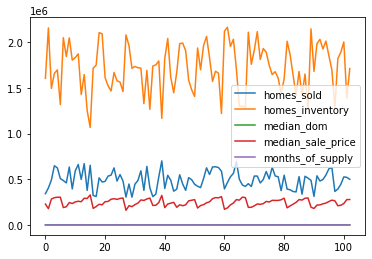

In [68]:
national_sales_bar_chart_df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA169B0E50>,
      dtype=object)

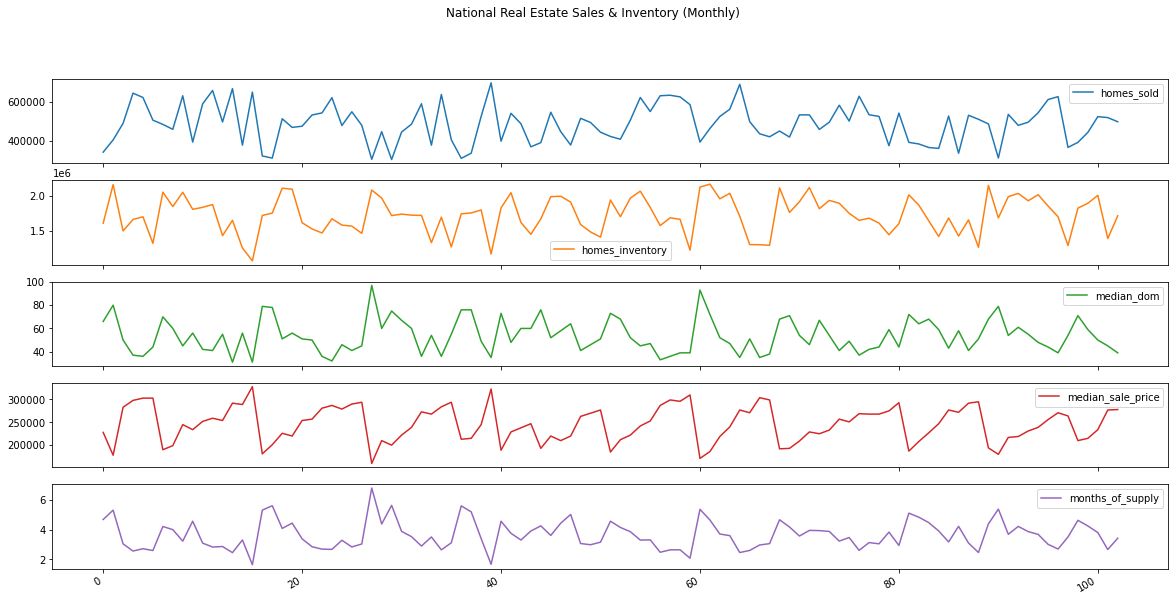

In [64]:
#plot line chart
#x_axis_data = np.arange(len(national_sales_bar_chart_df["month_year"]))
#xticks = [value for value in x_axis_data]
xticks = national_sales_bar_chart_df["month_year"]
national_sales_bar_chart_df.plot(title="National Real Estate Sales & Inventory (Monthly)",
                                 figsize=[20,10],
                                 subplots=True,
                                 sort_columns="month_year")

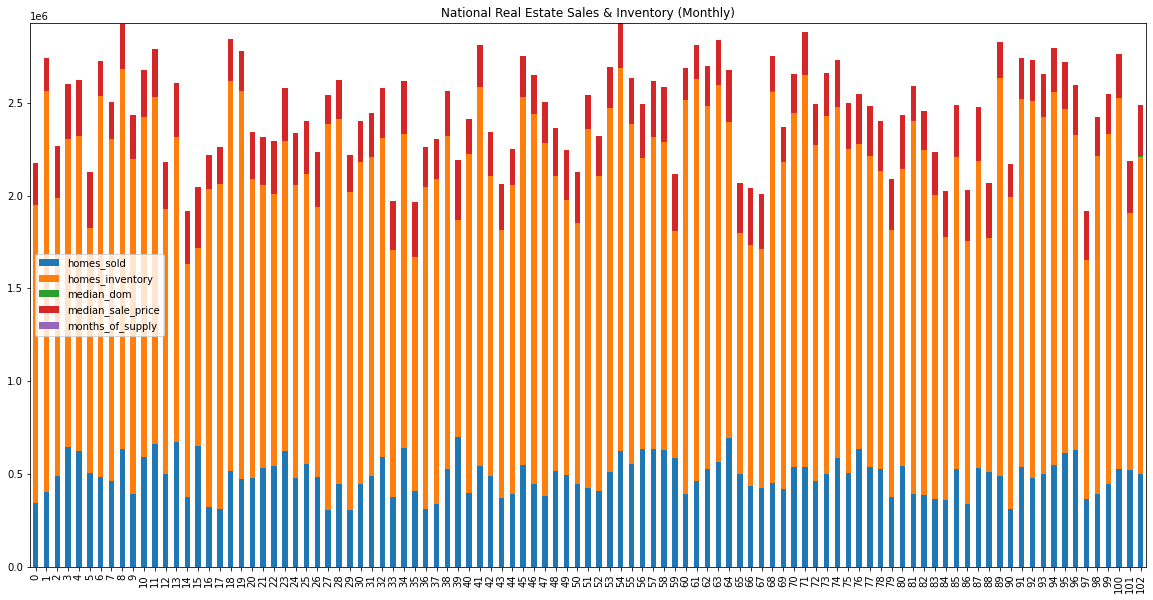

In [67]:
#plot bar chart
#x_axis_data = np.arange(len(national_sales_bar_chart_df["month_year"]))
#xticks = [value for value in x_axis_data]
xticks = national_sales_bar_chart_df["month_year"]
national_sales_bar_chart_df.plot.bar(title="National Real Estate Sales & Inventory (Monthly)",
                                 figsize=[20,10],
#                                 subplots=True,
                                 sort_columns="month_year",
                                    stacked=True)